<a href="https://colab.research.google.com/github/SalwaMustafa/DEPI-Tasks/blob/main/Classification_of_Fashion_mnist_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)


In [13]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

In [14]:

X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32')  / 255.0

X_train = np.expand_dims(X_train, -1)
X_test  = np.expand_dims(X_test, -1)

print("After reshape:", X_train.shape)


After reshape: (60000, 28, 28, 1)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42, stratify=y_train
)
print("Train:", X_train.shape, "Val:", X_val.shape)

Train: (54000, 28, 28, 1) Val: (6000, 28, 28, 1)


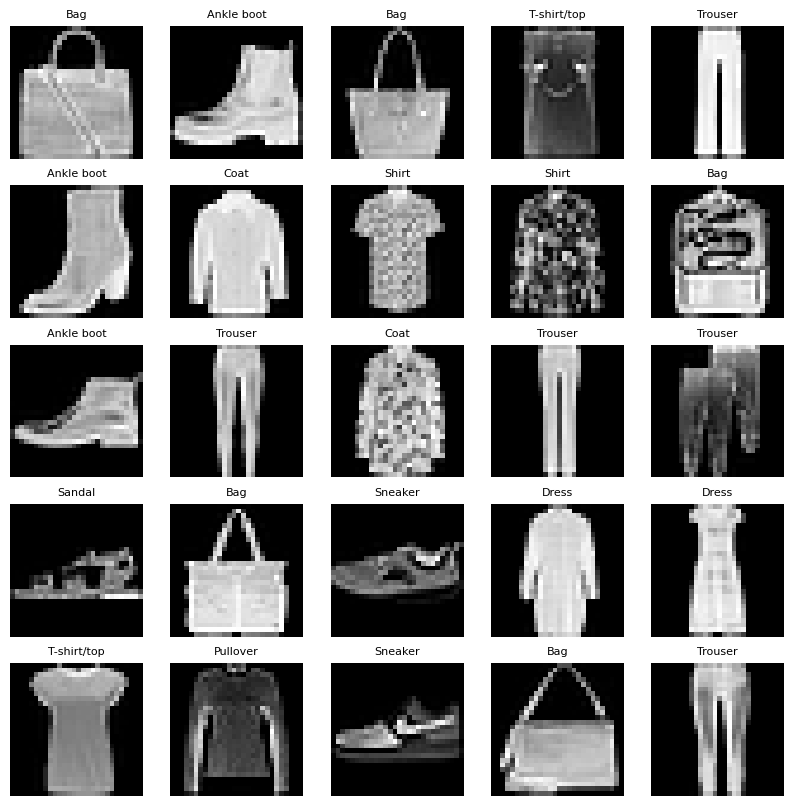

In [16]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]], fontsize=8)
    plt.axis('off')

plt.show()

In [17]:
def build_model(input_shape=(28,28,1), num_classes=10):

    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Dropout(0.25)(x)

    x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.GlobalAveragePooling2D()(x)

    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs)
    return model

model = build_model()
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,882 (437.04 KB)

 Trainable params: 111,178 (434.29 KB)

 Non-trainable params: 704 (2.75 KB)

In [18]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    keras.callbacks.ModelCheckpoint('fashion_mnist_cnn.h5', save_best_only=True, monitor='val_loss')
]

In [20]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=128,
    validation_data=(X_val, y_val),
    callbacks=callbacks
)

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7257 - loss: 0.8117

422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.7258 - loss: 0.8111 - val_accuracy: 0.1865 - val_loss: 3.9100 - learning_rate: 0.0010
Epoch 2/30
416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8715 - loss: 0.3672

422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8715 - loss: 0.3670 - val_accuracy: 0.8397 - val_loss: 0.4307 - learning_rate: 0.0010
Epoch 3/30
418/422 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8900 - loss: 0.3053

422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8900 - loss: 0.3053 - val_accuracy: 0.8755 - val_loss: 0.3403 - learning_rate: 0.0010
Epoch 4/30
415/422 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9001 - loss: 0.2791

422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9001 - loss: 0.2791 - val_accuracy: 0.8943 - val_loss: 0.2916 - learning_rate: 0.0010
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9084 - loss: 0.2584

422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9084 - loss: 0.2584 - val_accuracy: 0.9027 - val_loss: 0.2601 - learning_rate: 0.0010
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9113 - loss: 0.2407 - val_accuracy: 0.9008 - val_loss: 0.2737 - learning_rate: 0.0010
Epoch 7/30
416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9196 - loss: 0.2234

422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9195 - loss: 0.2235 - val_accuracy: 0.9212 - val_loss: 0.2212 - learning_rate: 0.0010
Epoch 8/30
416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9220 - loss: 0.2173

422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9220 - loss: 0.2173 - val_accuracy: 0.9210 - val_loss: 0.2138 - learning_rate: 0.0010
Epoch 9/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9252 - loss: 0.2071 - val_accuracy: 0.9048 - val_loss: 0.2667 - learning_rate: 0.0010
Epoch 10/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9279 - loss: 0.1984 - val_accuracy: 0.8973 - val_loss: 0.2815 - learning_rate: 0.0010
Epoch 11/30
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9305 - loss: 0.1927
Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9305 - loss: 0.1928 - val_accuracy: 0.9182 - val_loss: 0.2215 - learning_rate: 0.0010
Epoch 12/30
417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9365 - loss: 0.1747

422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9365 - loss: 0.1746 - val_accuracy: 0.9270 - val_loss: 0.2045 - learning_rate: 5.0000e-04
Epoch 13/30
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9421 - loss: 0.1587

422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9421 - loss: 0.1587 - val_accuracy: 0.9277 - val_loss: 0.1982 - learning_rate: 5.0000e-04
Epoch 14/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9438 - loss: 0.1553

422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9438 - loss: 0.1553 - val_accuracy: 0.9323 - val_loss: 0.1896 - learning_rate: 5.0000e-04
Epoch 15/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9473 - loss: 0.1448 - val_accuracy: 0.9310 - val_loss: 0.1926 - learning_rate: 5.0000e-04
Epoch 16/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9488 - loss: 0.1410 - val_accuracy: 0.9267 - val_loss: 0.2122 - learning_rate: 5.0000e-04
Epoch 17/30
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9504 - loss: 0.1355

422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9504 - loss: 0.1355 - val_accuracy: 0.9360 - val_loss: 0.1868 - learning_rate: 5.0000e-04
Epoch 18/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9529 - loss: 0.1313 - val_accuracy: 0.9077 - val_loss: 0.2677 - learning_rate: 5.0000e-04
Epoch 19/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9506 - loss: 0.1355 - val_accuracy: 0.9372 - val_loss: 0.1912 - learning_rate: 5.0000e-04
Epoch 20/30
416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9530 - loss: 0.1259
Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9530 - loss: 0.1259 - val_accuracy: 0.9272 - val_loss: 0.2223 - learning_rate: 5.0000e-04
Epoch 21/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9563 - loss: 0.1175 - val_accuracy: 0.9323 - val_loss: 0.2061 - learning_rate: 2.5000e-04
Epoch 22/30
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9600 - l

422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9600 - loss: 0.1054 - val_accuracy: 0.9398 - val_loss: 0.1769 - learning_rate: 2.5000e-04
Epoch 23/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9629 - loss: 0.1004 - val_accuracy: 0.9398 - val_loss: 0.1847 - learning_rate: 2.5000e-04
Epoch 24/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9617 - loss: 0.1037 - val_accuracy: 0.9393 - val_loss: 0.1960 - learning_rate: 2.5000e-04
Epoch 25/30
414/422 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9632 - loss: 0.1000
Epoch 25: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9632 - loss: 0.1001 - val_accuracy: 0.9335 - val_loss: 0.2115 - learning_rate: 2.5000e-04
Epoch 26/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9652 - loss: 0.0958 - val_accuracy: 0.9412 - val_loss: 0.1898 - learning_rate: 1.2500e-04
Epoch 27/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9668 - l

In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

313/313 - 2s - 6ms/step - accuracy: 0.9297 - loss: 0.2109
Test accuracy: 0.9297, Test loss: 0.2109


In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_test, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.90      0.86      0.88      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.89      0.90      0.89      1000
       Dress       0.93      0.92      0.93      1000
        Coat       0.90      0.89      0.89      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.78      0.81      0.79      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.98      0.99      0.99      1000
  Ankle boot       0.98      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



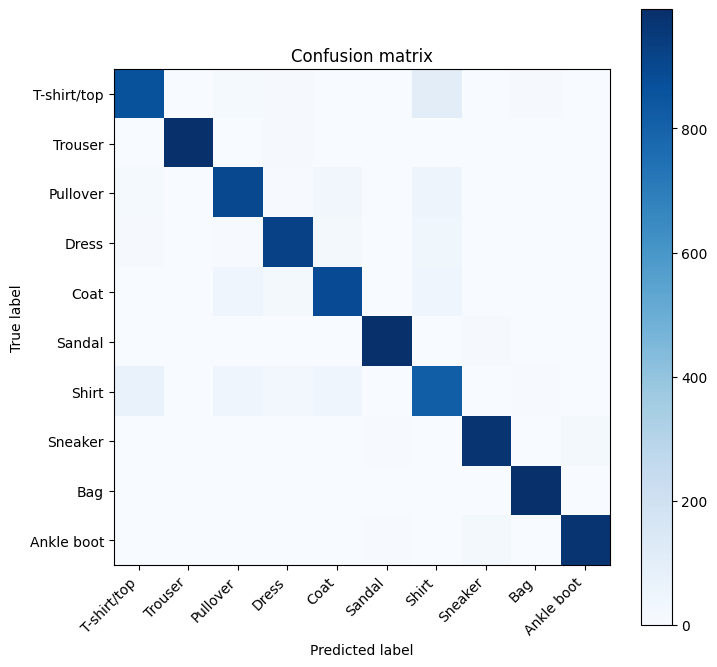

In [23]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
plt.xticks(range(10), class_names, rotation=45, ha='right')
plt.yticks(range(10), class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


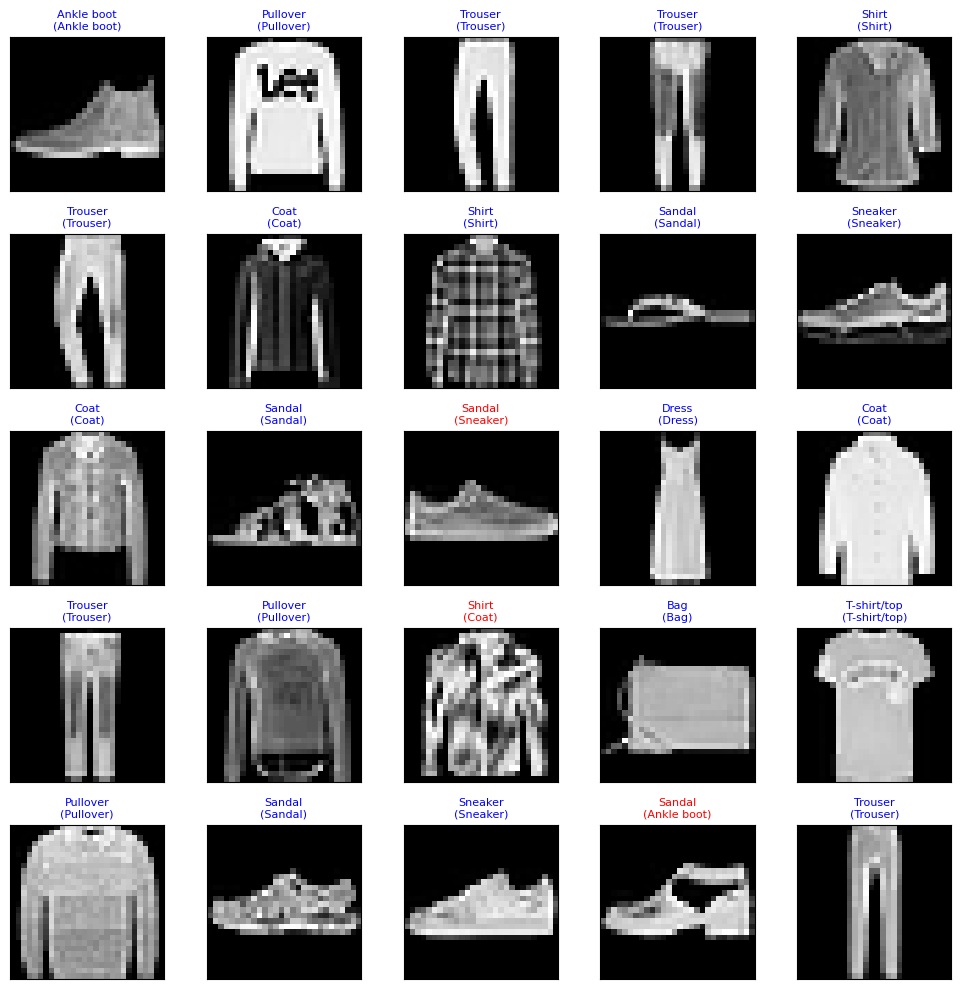

In [24]:
num_images = 25
predictions = model.predict(X_test[:num_images])

plt.figure(figsize=(10,10))
for i in range(num_images):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].squeeze(), cmap='gray')

    pred_label = np.argmax(predictions[i])
    true_label = y_test[i]

    color = 'blue' if pred_label == true_label else 'red'
    plt.title(f"{class_names[pred_label]}\n({class_names[true_label]})",
              color=color, fontsize=8)
plt.tight_layout()
plt.show()